In [1]:
import pandas as pd


In [13]:
na=pd.read_csv('/Users/nooreen/Downloads/nasir_output.csv')


In [17]:
na['loyal-member'].unique()


array(['Yes'], dtype=object)

In [2]:
data=pd.read_csv('result.csv')


/var/folders/lg/b8pw7x296y397cn0g302yt680000gp/T/ipykernel_3401/3521693184.py:1: DtypeWarning: Columns (14,18) have mixed types. Specify dtype option on import or set low_memory=False.
  data=pd.read_csv('result.csv')


In [3]:
data.columns


Index(['StoreId', 'Date', 'CheckTime', 'UniqueCheckId', 'PLU', 'MenuItemId',
       'MenuItemName', 'ItemCount', 'Amount', 'Tax', 'LineType',
       'LineTypeDescription', 'CategoryName', 'ReductionId', 'ReductionName',
       'order_channel', 'Order_type', 'discount_amt', 'DiscountName', 'date',
       'time', 'hour', 'month', 'year', 'Key', 'loyal_member'],
      dtype='object')

In [12]:
data[data['loyal_member']=='yes']
data.columns


Index(['StoreId', 'Date', 'CheckTime', 'UniqueCheckId', 'PLU', 'MenuItemId',
       'MenuItemName', 'ItemCount', 'Amount', 'Tax', 'LineType',
       'LineTypeDescription', 'CategoryName', 'ReductionId', 'ReductionName',
       'order_channel', 'Order_type', 'discount_amt', 'DiscountName', 'date',
       'time', 'hour', 'month', 'year', 'Key', 'loyal_member'],
      dtype='object')

In [11]:
df =data.copy()


In [10]:
df.groupby('loyal_member')['CategoryName'].agg(['sum', 'mean', 'count']).rename(
    columns={'sum': 'Total_Sales', 'mean': 'Avg_Sales_Per_Transaction', 'count': 'Transaction_Count'}
)


Index(['StoreId', 'Date', 'CheckTime', 'UniqueCheckId', 'PLU', 'MenuItemId',
       'MenuItemName', 'ItemCount', 'Amount', 'Tax', 'LineType',
       'LineTypeDescription', 'CategoryName', 'ReductionId', 'ReductionName',
       'order_channel', 'Order_type', 'discount_amt', 'DiscountName', 'date',
       'time', 'hour', 'month', 'year', 'Key', 'loyal_member'],
      dtype='object')

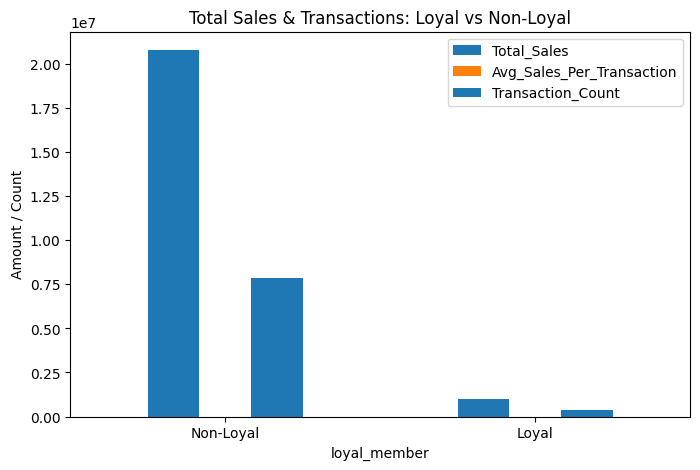

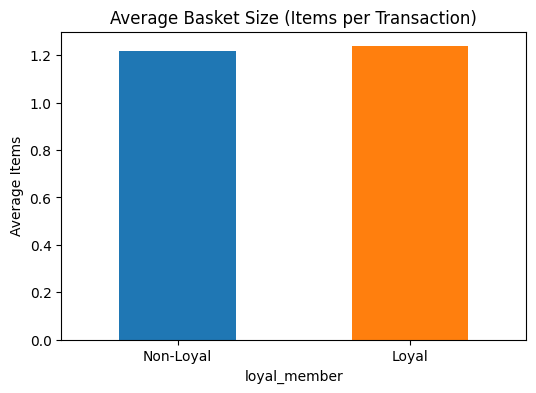

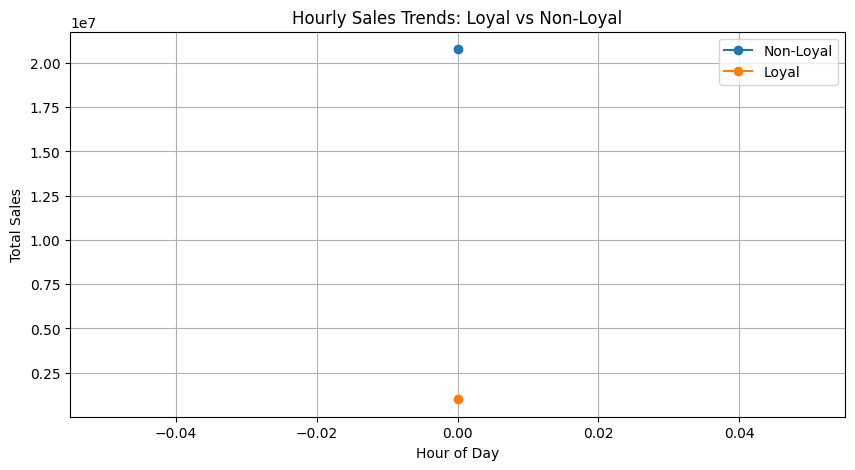

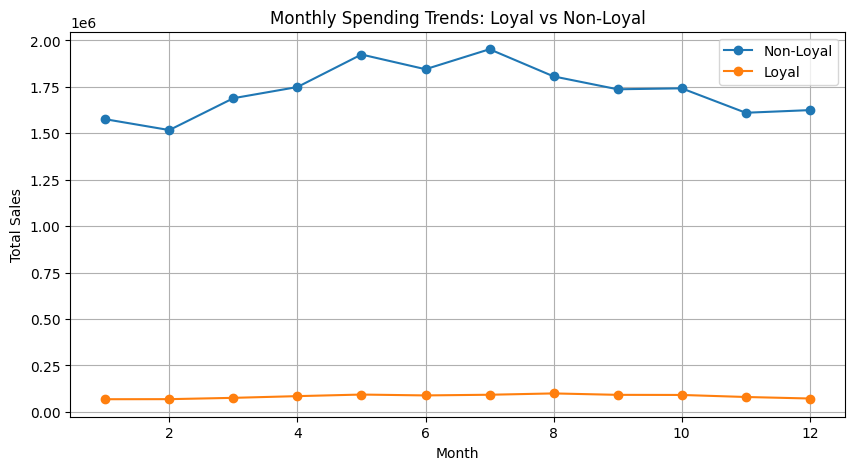

KeyError: True

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your data
df =data.copy()


# Define color palette for loyal vs non-loyal
colors = ['#1f77b4', '#ff7f0e']  # Blue (Non-Loyal), Orange (Loyal)

### 1️⃣ **Overall Sales & Transaction Count**
sales_summary = df.groupby('loyal_member')['Amount'].agg(['sum', 'mean', 'count']).rename(
    columns={'sum': 'Total_Sales', 'mean': 'Avg_Sales_Per_Transaction', 'count': 'Transaction_Count'}
)
sales_summary.plot(kind='bar', figsize=(8,5), color=colors)
plt.title("Total Sales & Transactions: Loyal vs Non-Loyal")
plt.ylabel("Amount / Count")
plt.xticks(ticks=[0, 1], labels=['Non-Loyal', 'Loyal'], rotation=0)
plt.legend(sales_summary.columns)
plt.show()

### 2️⃣ **Average Basket Size**
basket_size = df.groupby('loyal_member')['ItemCount'].mean()
basket_size.plot(kind='bar', figsize=(6,4), color=colors)
plt.title("Average Basket Size (Items per Transaction)")
plt.ylabel("Average Items")
plt.xticks(ticks=[0, 1], labels=['Non-Loyal', 'Loyal'], rotation=0)
plt.show()

### 3️⃣ **Hourly Sales Trends**
hourly_sales = df.groupby(['hour', 'loyal_member'])['Amount'].sum().unstack()
hourly_sales.plot(figsize=(10,5), marker='o')
plt.title("Hourly Sales Trends: Loyal vs Non-Loyal")
plt.xlabel("Hour of Day")
plt.ylabel("Total Sales")
plt.legend(["Non-Loyal", "Loyal"])
plt.grid()
plt.show()

### 4️⃣ **Monthly Sales Trends**
monthly_sales = df.groupby(['month', 'loyal_member'])['Amount'].sum().unstack()
monthly_sales.plot(figsize=(10,5), marker='o')
plt.title("Monthly Spending Trends: Loyal vs Non-Loyal")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.legend(["Non-Loyal", "Loyal"])
plt.grid()
plt.show()

### 5️⃣ **Menu Item Preferences**
top_items = df.groupby(['MenuItemName', 'loyal_member'])['ItemCount'].sum().unstack().fillna(0)
top_items = top_items.sort_values(by=True, ascending=False).head(10)
top_items.plot(kind='barh', figsize=(10,6), color=colors)
plt.title("Top Menu Items: Loyal vs Non-Loyal")
plt.xlabel("Total Items Sold")
plt.ylabel("Menu Item")
plt.legend(["Non-Loyal", "Loyal"])
plt.show()

### 6️⃣ **Order Channel & Type Behavior**
order_channel = df.groupby(['order_channel', 'loyal_member'])['UniqueCheckId'].nunique().unstack()
order_channel.plot(kind='bar', figsize=(8,5), color=colors)
plt.title("Order Channel Usage: Loyal vs Non-Loyal")
plt.ylabel("Total Orders")
plt.legend(["Non-Loyal", "Loyal"])
plt.show()

order_type = df.groupby(['Order_type', 'loyal_member'])['UniqueCheckId'].nunique().unstack()
order_type.plot(kind='bar', figsize=(8,5), color=colors)
plt.title("Order Type Preference: Loyal vs Non-Loyal")
plt.ylabel("Total Orders")
plt.legend(["Non-Loyal", "Loyal"])
plt.show()

### 7️⃣ **Discount & Promotions Usage**
discount_usage = df.groupby
